<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 1</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Marco Roco Arias</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Crea tu perfil y un repositorio para las actividades del curso en Github
<p align="justify">
Tanto en el mercado laboral como a nivel de investigación científica, se ha normalizado el uso de herramientas de desarrollo continuo (CI/CD), entre las que se cuenta a GitHub. 

<p align="justify">
Debes crear tu cuenta y primer repositorio en GitHub. 

El respositorio deberá tener un archivo README y subcarpetas para las actividades del semestre. Allí deberás alojar el archivo de Jupyter Notebook con el código y todos los recursos para la posterior revisión de tu trabajo.
    
Este medio será el canal de entrega de tus actividades cada semana, de tal forma que al final del curso debes tener un portafolio de tu trabajo para presentar a tus colegas o en la industria.
    
    

In [ ]:
# MARCOROCOARIAS
# https://github.com/MARCOROCOARIAS/EIE401-PDM

## 2. Define en python vectores y funciones
<p align="justify">
Debes generar vectores que representan intervalos de tiempo o de una variable.
Debes ingresar las funciones matemáticas y evaluarlas en los vectores generados.

$$
f(x) =  e^{-x^2} 
$$

$$
f(z) =  ysin(x) 
$$

<p align="justify">
Haz una gráfica para cada uno de las funciones evaluadas.
    
    

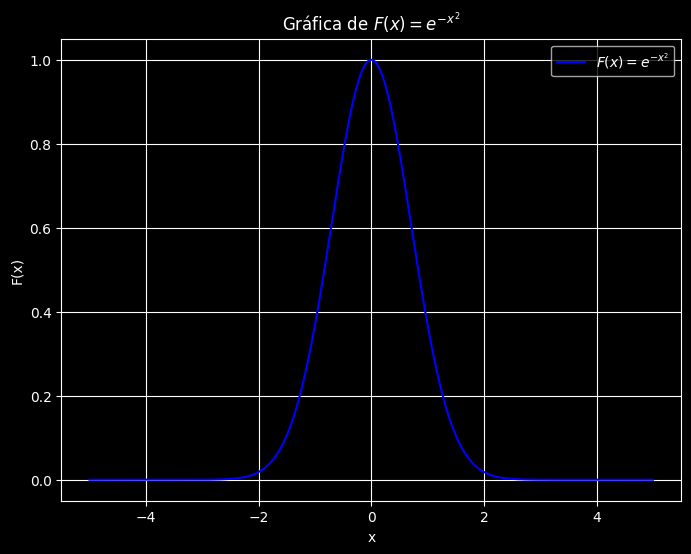

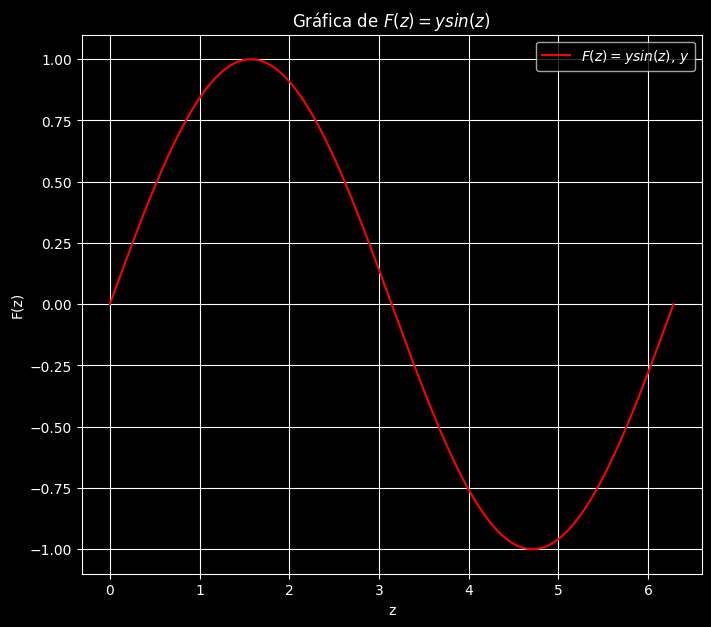

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de la variable x para las funciones
x = np.linspace(-5, 5, 1000)

# Definir la función F(x) = e^(-x^2)
def F_x(x):
    return np.exp(-x**2)

# Evaluar la función F(x) en el rango dado
y1 = F_x(x)

# Graficar la función F(x)
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='$F(x) = e^{-x^2}$', color='blue')
plt.title('Gráfica de $F(x) = e^{-x^2}$')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()

# Definir el rango de la variable z para la función
z = np.linspace(0, 2*np.pi, 1000)

# Definir la función F(z) = y * sin(z)
def F_z(y, z):
    return y * np.sin(z)

# Evaluar la función F(z) para y=1 en el rango dado
y2 = F_z(1, z)

# Graficar la función F(z)
plt.figure(figsize=(8, 7))
plt.plot(z, y2, label='$F(z) = y sin(z)$, $y$', color='red')
plt.title('Gráfica de $F(z) = y sin(z)$ ')
plt.xlabel('z')
plt.ylabel('F(z)')
plt.legend()
plt.grid(True)
plt.show()

## 3. Ruido
<p align="justify">
Crear una señal (senoidal, cosenoidal, etc) y demuestra la agregación de ruido.
    


### 3.1 Ruido Gaussiano
Debes agregar la señal de ruido a la que creaste previamente. Adicionalmente, debes mostrar una gráfica con el resultado.


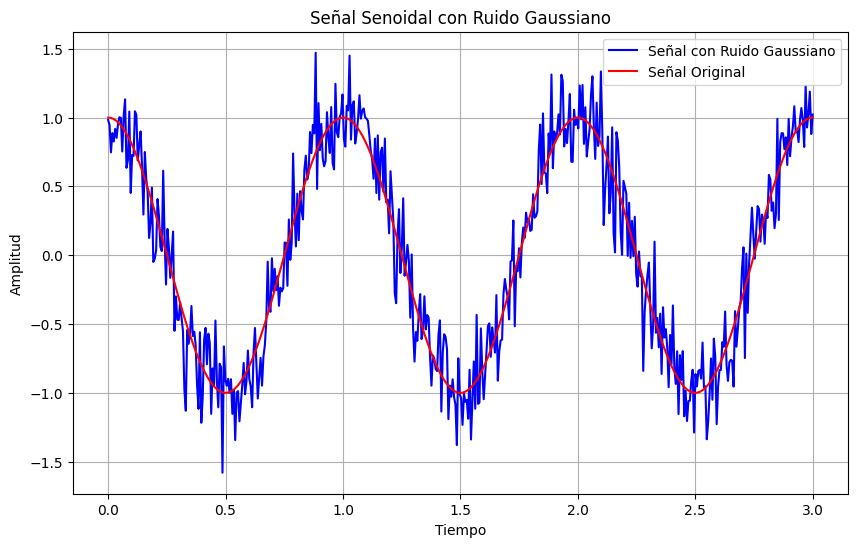

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros para la señal senoidal
amplitud = 1.0
frecuencia = 1.0  # Hz
fase = np.pi / 2  # 45 grados
tiempo_inicio = 0
tiempo_fin = 3
numero_puntos = 500

# Generar el vector de tiempo
tiempo = np.linspace(tiempo_inicio, tiempo_fin, numero_puntos)

# Crear la señal senoidal
senal= amplitud * np.sin(2 * np.pi * frecuencia * tiempo + fase)

# Generar ruido gaussiano
media_ruido = 0
desviacion_estandar_ruido = 0.2
ruido_gaussiano = np.random.normal(media_ruido, desviacion_estandar_ruido, numero_puntos)

# Agregar ruido a la señal original
senal_ruido = senal+ ruido_gaussiano

# Graficar la señal original y la señal con ruido
plt.figure(figsize=(10, 6))
plt.plot(tiempo, senal_ruido, label='Señal con Ruido Gaussiano', color='blue')
plt.plot(tiempo, senal, label='Señal Original', color='red')
plt.title('Señal Senoidal con Ruido Gaussiano')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


### 3.2 Ruido Rosa

Investiga en que consiste el ruido rosa, cual es la diferencia del ruido gaussiano y demuéstralo.

R: El ruido rosa se caracteriza por tener una densidad espectral de potencia que disminuye inversamente con la frecuencia. Esto significa que, a medida que la frecuencia aumenta, la potencia por unidad de frecuencia disminuye.

El término "1/f" surge precisamente de esta característica, donde la potencia del ruido es proporcional a 1/f, donde f es la frecuencia. En otras palabras, la densidad espectral de potencia del ruido rosa es inversamente proporcional a la frecuencia.

La principal diferencia entre el ruido rosa y el ruido gaussiano radica en cómo se distribuye la energía en el dominio de la frecuencia.

Ruido Gaussiano: En el ruido gaussiano, la energía está distribuida de manera uniforme en todas las frecuencias. Esto significa que no hay ninguna tendencia en particular en cuanto a cómo varía la energía con respecto a la frecuencia. En otras palabras, la densidad espectral de potencia del ruido gaussiano es constante en todas las frecuencias.

Ruido Rosa: Por otro lado, en el ruido rosa, la energía disminuye inversamente con la frecuencia. Esto significa que hay más energía presente en las frecuencias más bajas y menos energía en las frecuencias más altas. La densidad espectral de potencia del ruido rosa es inversamente proporcional a la frecuencia, como se mencionó anteriormente.

C:\Users\drook\AppData\Local\Temp\ipykernel_4740\1340098848.py:25: RuntimeWarning: divide by zero encountered in divide
  return np.where(f == 0, 0, 1/np.sqrt(f))


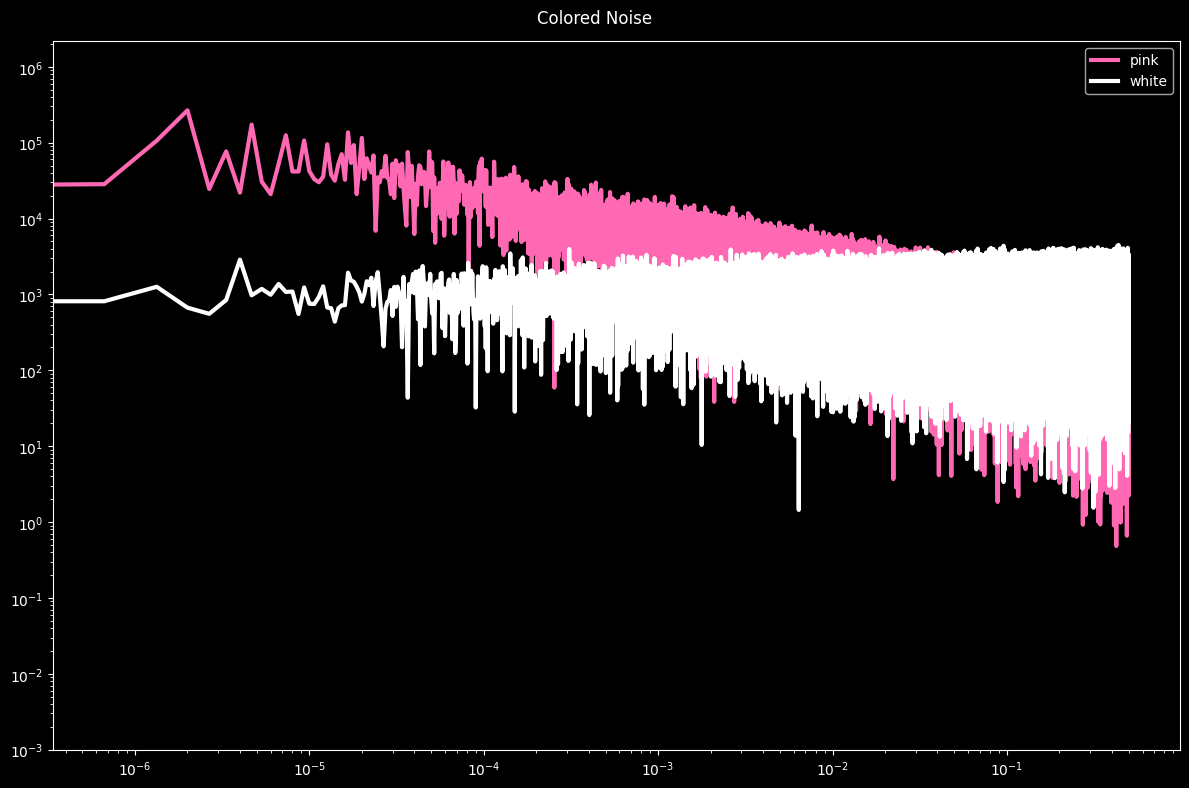

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    return plt.loglog(f, np.abs(np.fft.rfft(s)))[0]

def noise_psd(N, psd=lambda f: 1):
    X_white = np.fft.rfft(np.random.randn(N))
    S = psd(np.fft.rfftfreq(N))
    # Normalize S
    S = S / np.sqrt(np.mean(S**2))
    X_shaped = X_white * S
    return np.fft.irfft(X_shaped)

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1

@PSDGenerator
def pink_noise(f):
    return np.where(f == 0, 0, 1/np.sqrt(f))

plt.style.use('dark_background')
plt.figure(figsize=(12, 8), tight_layout=True)
for G, c in zip(
        [pink_noise, white_noise], 
        ['hotpink', 'white']):
    plot_spectrum(G(30*50_000)).set(color=c, linewidth=3)
plt.legend(['pink', 'white'])
plt.suptitle("Colored Noise")
plt.ylim([1e-3, None])
plt.show()


## 4. Referencias
<p align="justify">
    
[Generate colors of noise in Python] https://stackoverflow.com/questions/67085963/generate-colors-of-noise-in-python

[Generación de señales]https://medium.com/@martinkarlsson.io/fourier-transform-in-python-f15b3243ce9a

[Fourier Transform]https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

[SciPy] https://docs.scipy.org/doc/scipy/tutorial/fft.html

[Fourier con numpy] https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a